In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data = pd.read_csv('/kaggle/input/gunviolence1/updated_with_coordinates.csv')

In [4]:
data.sample(5)

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Latitude,Longitude,Coordinates_Found
301,2888610,"April 22, 2024",Virginia,Petersburg,5900 block of Sentry Hill Ct,0,5,0,0,0,NaN,37.22815,-77.40348,Yes
46,3013319,"September 2, 2024",Alabama,Bessemer,200 Fourth Ave N,0,4,0,0,0,NaN,33.40203,-86.95399,Yes
6,3051689,"October 19, 2024",Indiana,Fort Wayne,4911 Manistee Dr,1,10,0,0,0,NaN,41.08026,-85.13831,Yes
134,2967464,"July 12, 2024",Kentucky,Louisville,900 block of Esquire Alley,0,5,0,0,0,NaN,38.25489,-85.76666,Yes
54,3010531,"August 30, 2024",Minnesota,Burnsville,12100 River Hills Dr,0,5,0,0,0,NaN,44.76634,-93.27615,Yes


In [5]:
#checking any missing in this or not 
data.isnull().sum()

Incident ID            0
Incident Date          0
State                  0
City Or County         0
Address                1
Victims Killed         0
Victims Injured        0
Suspects Killed        0
Suspects Injured       0
Suspects Arrested      0
Operations           427
Latitude               0
Longitude              0
Coordinates_Found      0
dtype: int64

In [5]:



data['Incident Date'] = pd.to_datetime(data['Incident Date'])
data['Month'] = data['Incident Date'].dt.to_period('M')


In [11]:
data.sample(5)

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Latitude,Longitude,Coordinates_Found,Month
61,3006116,2024-08-25,Georgia,Warner Robins,308 Shirley Dr,0,4,0,0,0,NaN,32.62083,-83.60687,Yes,2024-08
285,2900213,2024-05-04,Pennsylvania,Philadelphia,1007 S 51st St,1,3,0,0,0,NaN,39.95222,-75.16218,Yes,2024-05
63,3005802,2024-08-25,Pennsylvania,Allentown,112 N 7th St,0,6,0,0,2,NaN,40.60263,-75.47027,Yes,2024-08
118,2974973,2024-07-22,Wisconsin,Milwaukee,6901 W Vienna Ave,1,8,0,0,1,NaN,43.04223,-87.90690,Yes,2024-07
48,3020008,2024-09-02,New Jersey,Newark,500 block of Clinton Ave,0,4,0,0,0,NaN,40.73197,-74.17421,Yes,2024-09


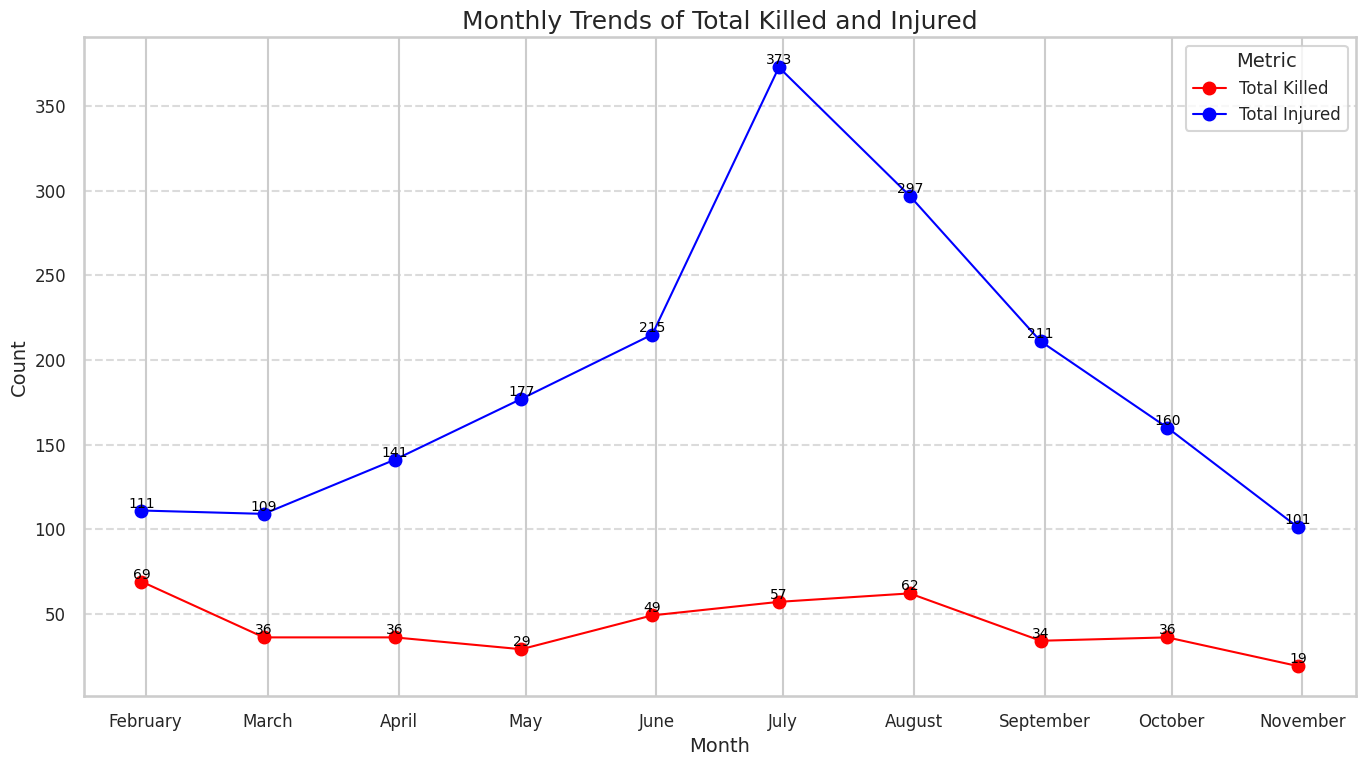

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Assuming `data` is your DataFrame
# Convert "Incident Date" to datetime
data['Incident Date'] = pd.to_datetime(data['Incident Date'], errors='coerce')

# Create a new column for months
data['Month'] = data['Incident Date'].dt.to_period('M')

# Group by Month and aggregate totals
monthly_summary = data.groupby('Month', sort=False).agg(
    total_killed=('Victims Killed', 'sum'),
    total_injured=('Victims Injured', 'sum')
).reset_index()

# Convert 'Month' to timestamp for plotting
monthly_summary['Month'] = monthly_summary['Month'].dt.to_timestamp('M')

# Prepare data for plotting
x = monthly_summary['Month']
y1 = monthly_summary['total_killed']
y2 = monthly_summary['total_injured']

# Initialize the plot
plt.figure(figsize=(14, 8))

# Plot lines for each metric
plt.plot(x, y1, label='Total Killed', marker='o', linewidth=1.5, color='red')
plt.plot(x, y2, label='Total Injured', marker='o', linewidth=1.5, color='blue')

# Annotate key points on the plot
for i, value in enumerate(y1):
    if value > 0:  # Annotate only if count > 0
        plt.text(x[i], y1[i], f'{value}', color='black', fontsize=10, ha='center', va='bottom')
for i, value in enumerate(y2):
    if value > 0:
        plt.text(x[i], y2[i], f'{value}', color='black', fontsize=10, ha='center', va='bottom')

# Customize the plot
plt.title('Monthly Trends of Total Killed and Injured', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Format x-axis to show full month names
date_format = DateFormatter("%B")  # Use "%b" for abbreviated month names (e.g., Jan)
plt.gca().xaxis.set_major_formatter(date_format)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Metric', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


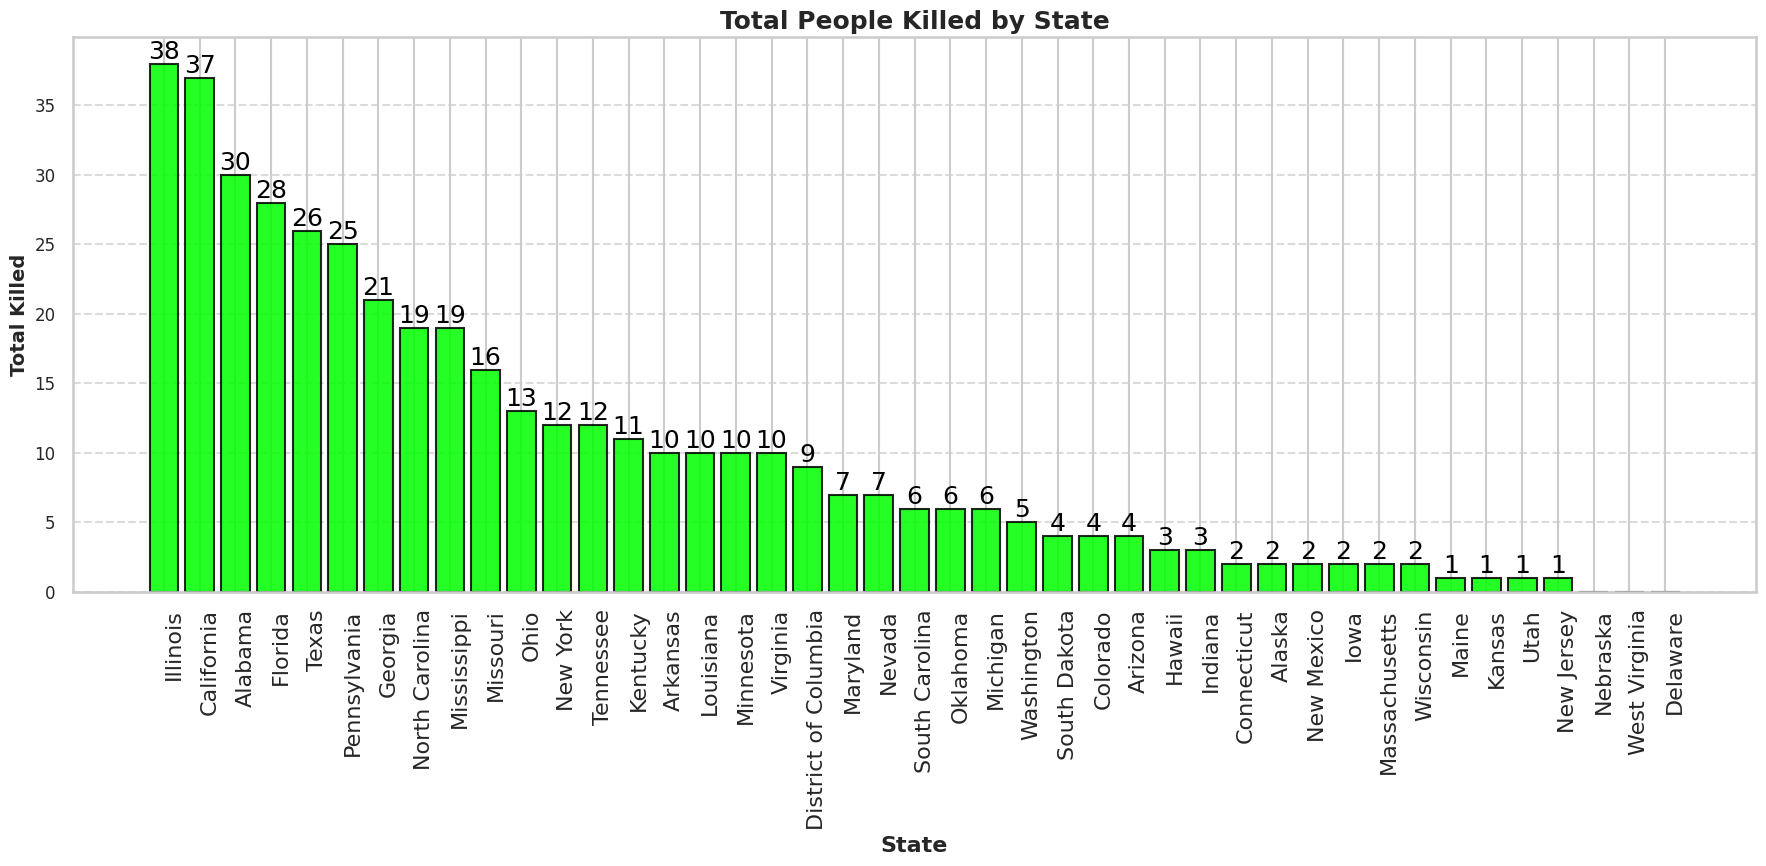

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by State and calculate total killed and injured
state_summary = data.groupby('State', sort=False).agg(
    total_killed=('Victims Killed', 'sum'),
    total_injured=('Victims Injured', 'sum')
).reset_index()

# Sort by total_killed for better visualization
state_summary = state_summary.sort_values(by='total_killed', ascending=False)

# Prepare data for plotting
x = state_summary['State']
y = state_summary['total_killed']

# Create the plot
plt.figure(figsize=(18, 9))
bars = plt.bar(x, y, color='lime', edgecolor='black', alpha=0.85)

# Add annotations to the bars
for bar in bars:
    height = bar.get_height()
    if height > 0:  # Annotate only non-zero bars
        plt.text(
            bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
            ha='center', va='bottom', fontsize=18, color='black'
        )

# Customize the plot
plt.title('Total People Killed by State', fontsize=18,fontweight='bold')
plt.xlabel('State', fontsize=16,fontweight='bold')
plt.ylabel('Total Killed', fontsize=14,fontweight='bold')
plt.xticks(rotation=90, fontsize=16, ha='left')  # Rotate state labels for better readability
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


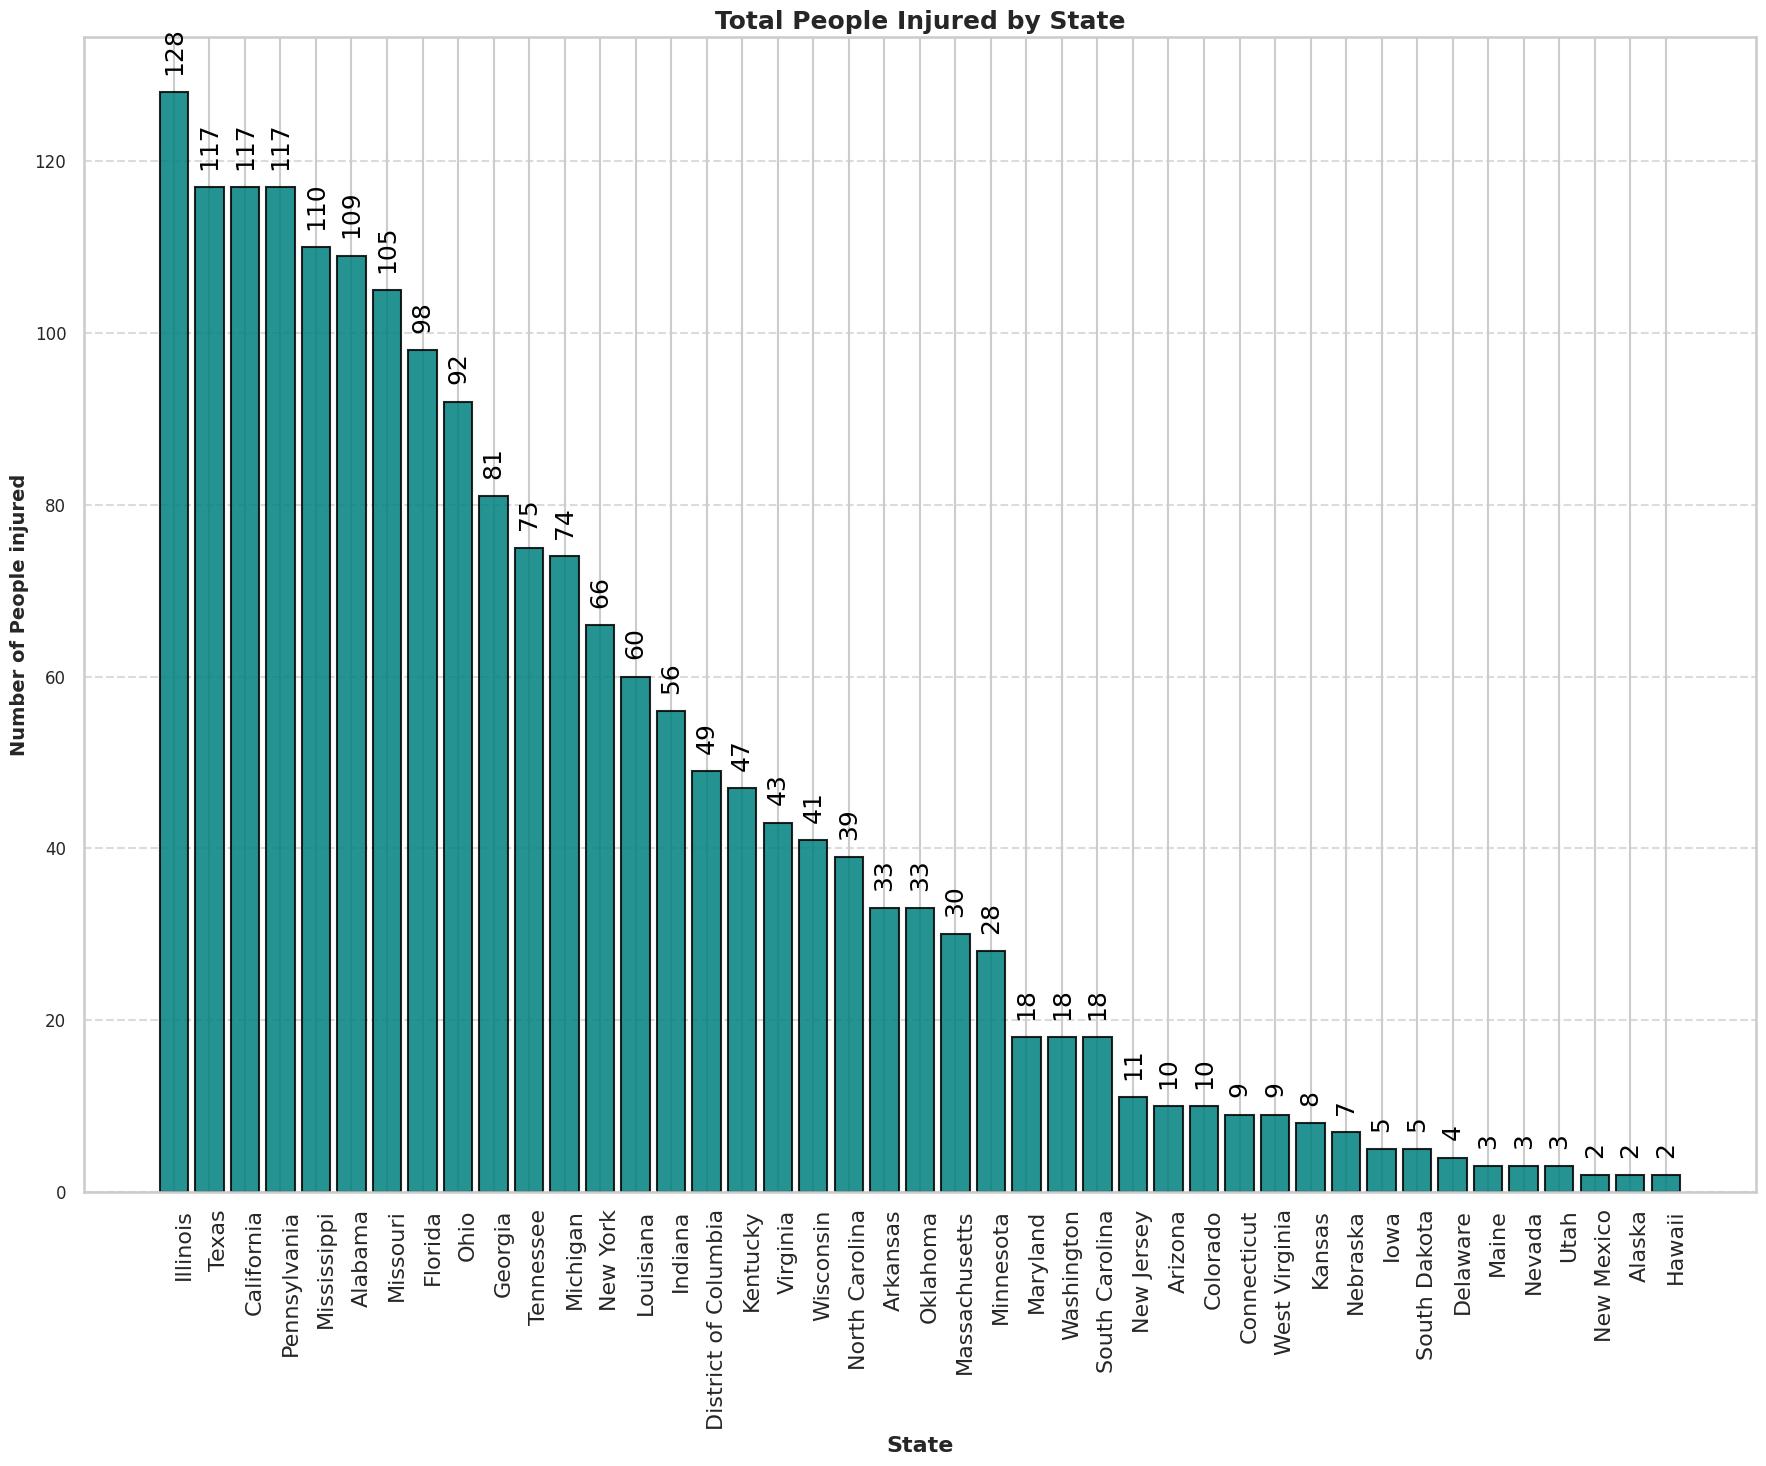

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by State and calculate total killed and injured
state_summary = data.groupby('State', sort=False).agg(
    total_killed=('Victims Killed', 'sum'),
    total_injured=('Victims Injured', 'sum')
).reset_index()

# Sort by total_killed for better visualization
state_summary = state_summary.sort_values(by='total_injured', ascending=False)

# Prepare data for plotting
x = state_summary['State']
y = state_summary['total_injured']

# Create the plot
plt.figure(figsize=(18, 15))
bars = plt.bar(x, y, color='teal', edgecolor='black', alpha=0.85,width = 0.8)

# Add annotations to the bars
for bar in bars:
    height = bar.get_height()
    if height > 0:  # Annotate only non-zero bars
        plt.text(
            bar.get_x() + bar.get_width() / 2, height + 2, f'{int(height)}',
            ha='center', va='bottom', fontsize=18, color='black',rotation = 90
        )

# Customize the plot
plt.title('Total People Injured by State', fontsize=18,fontweight='bold')
plt.xlabel('State', fontsize=16,fontweight='bold')
plt.ylabel('Number of People injured', fontsize=14,fontweight='bold')
plt.xticks(rotation=90, fontsize=16, ha='left')  # Rotate state labels for better readability
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [74]:
data.sample(5)

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Latitude,Longitude,Coordinates_Found,Month
27,3030531,2024-09-21,Alabama,Birmingham,2012 Magnolia Ave,4,17,0,0,1,NaN,33.52072,-86.81179,Yes,2024-09
407,2806941,2024-01-20,Pennsylvania,Coraopolis,870 Fourth Ave,1,3,0,0,0,NaN,40.51748,-80.16423,Yes,2024-01
147,2961005,2024-07-06,Wisconsin,Milwaukee,Doctor Martin Luther King Jr Dr and 6th St,0,4,0,0,0,NaN,43.04223,-87.90690,Yes,2024-07
397,2812487,2024-01-27,North Carolina,Charlotte,8508 Lodge S Cir,3,1,0,0,0,NaN,35.22286,-80.83796,Yes,2024-01
178,2948227,2024-06-23,California,Vallejo,Spring Rd and Monterey St,1,3,0,0,0,NaN,38.10095,-122.25495,Yes,2024-06


In [8]:
import pandas as pd
import plotly.express as px

# Group by City Or County and calculate total killed and injured
city_summary = data.groupby('City Or County', sort=False).agg(
    total_killed=('Victims Killed', 'sum'),
    total_injured=('Victims Injured', 'sum')
).reset_index()

# Sort by total_killed for better visualization
city_summary = city_summary.sort_values(by='total_killed', ascending=False)

# Plot using Plotly
fig = px.bar(
    city_summary,
    x='City Or County',
    y='total_killed',
    title='Total People Killed by City or County',
    labels={'City Or County': 'City or County', 'total_killed': 'Number of People Killed'},
    color='total_killed',  # Color based on total killed for visual effect
    color_continuous_scale='teal'
)

# Customize layout for better readability
fig.update_layout(
    title_font_size=20,
    xaxis=dict(
        title='City or County',
        tickangle=90,  # Tilt x-axis labels
        title_font=dict(size=14),
        tickfont=dict(size=10)
    ),
    yaxis=dict(
        title='Number of People Killed',
        title_font=dict(size=14),
        tickfont=dict(size=12)
    ),
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    margin=dict(l=40, r=40, t=60, b=100),  # Adjust margins for x-axis labels
    width = 700,
    height  = 500
)

# Show the interactive plot
fig.show()


In [6]:
import pandas as pd
import plotly.express as px

# Group by City Or County and calculate total killed and injured
city_summary = data.groupby('City Or County', sort=False).agg(
    total_killed=('Victims Killed', 'sum'),
    total_injured=('Victims Injured', 'sum')
).reset_index()

# Sort by total_killed for better visualization
city_summary = city_summary.sort_values(by='total_injured', ascending=False)

# Plot using Plotly
fig = px.bar(
    city_summary,
    x='City Or County',
    y='total_injured',
    title='Total People Injured by City or County',
    labels={'City Or County': 'City or County', 'total_injured': 'Number of People Injured'},
    color='total_injured',  # Color based on total killed for visual effect
    color_continuous_scale='teal'
)

# Customize layout for better readability
fig.update_layout(
    title_font_size=20,
    xaxis=dict(
        title='City or County',
        tickangle=90,  # Tilt x-axis labels
        title_font=dict(size=14),
        tickfont=dict(size=10)
    ),
    yaxis=dict(
        title='Number of People Injured',
        title_font=dict(size=14),
        tickfont=dict(size=12)
    ),
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    margin=dict(l=40, r=40, t=60, b=100),  # Adjust margins for x-axis labels
    width = 700,
    height  = 500
)

# Show the interactive plot
fig.show()


In [6]:
data.sample(5)

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Latitude,Longitude,Coordinates_Found,Month
220,2934537,2024-06-08,North Carolina,Charlotte,616 N Tryon St,1,3,0,0,1,NaN,35.22286,-80.83796,Yes,2024-06
31,3026197,2024-09-16,Illinois,Chicago,1500 W 51st St,0,4,0,0,0,NaN,41.88425,-87.63245,Yes,2024-09
85,2993537,2024-08-10,Ohio,Cleveland,4071 Lee Rd,0,4,0,0,0,NaN,41.50473,-81.69074,Yes,2024-08
83,2992918,2024-08-12,Illinois,Chicago,750 S Clinton St,0,4,0,0,0,NaN,41.88425,-87.63245,Yes,2024-08
202,2940337,2024-06-15,Michigan,Southfield,17587 Margate Ave,0,6,0,0,0,NaN,42.48327,-83.24111,Yes,2024-06


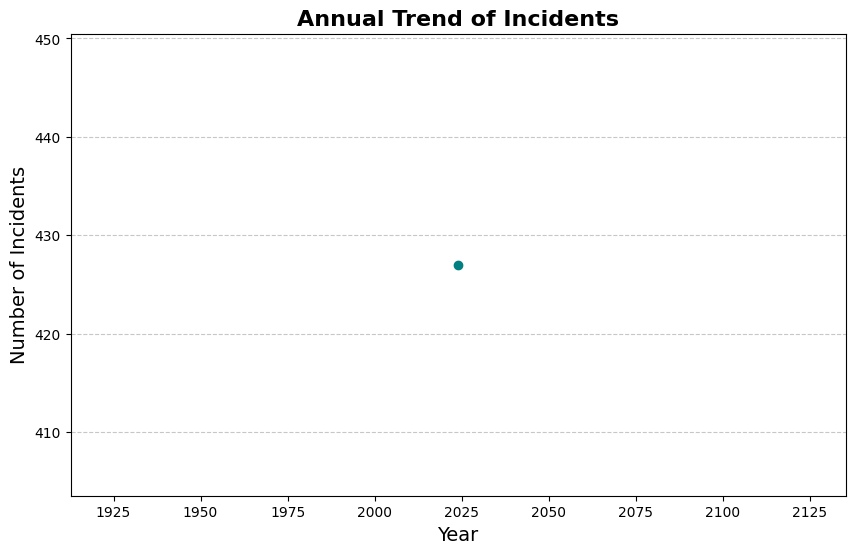

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Step 1: Preprocess the Data for Temporal Analysis
# Convert 'Incident Date' to datetime
data['Incident Date'] = pd.to_datetime(data['Incident Date'])

# Extract year, month, and day components
data['Year'] = data['Incident Date'].dt.year
data['Month'] = data['Incident Date'].dt.month
data['Day'] = data['Incident Date'].dt.day

# Define seasons based on months
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

data['Season'] = data['Month'].apply(get_season)

# Step 2: Group Data for Temporal Insights
# Group by year to see annual trends
annual_trends = data.groupby('Year').size().reset_index(name='Incident Count')

# Group by month to see monthly trends
monthly_trends = data.groupby('Month').size().reset_index(name='Incident Count')

# Group by season to analyze seasonal trends
seasonal_trends = data.groupby('Season').size().reset_index(name='Incident Count')

# Step 3: Visualize the Trends
# Annual Trend Plot
plt.figure(figsize=(10, 6))
plt.plot(annual_trends['Year'], annual_trends['Incident Count'], marker='o', color='teal')
plt.title('Annual Trend of Incidents', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()





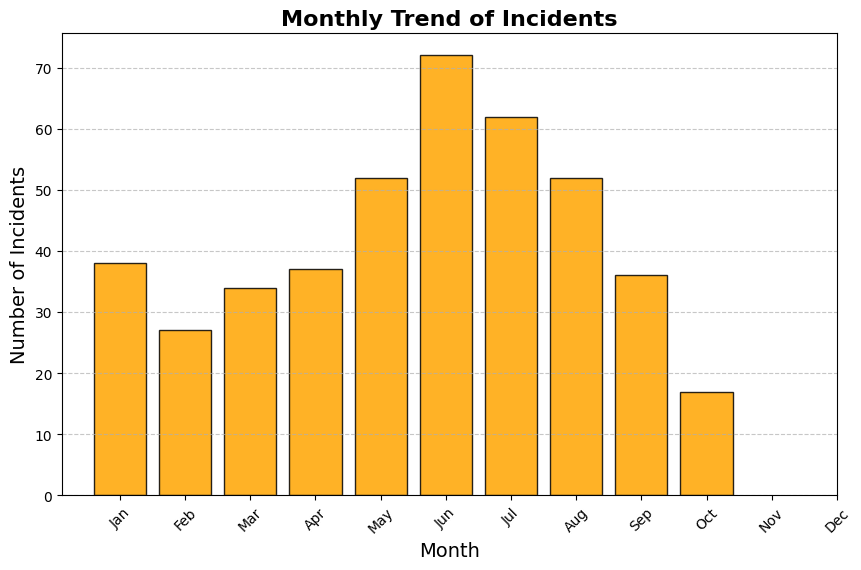

In [14]:
# Monthly Trend Plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_trends['Month'], monthly_trends['Incident Count'], color='orange', edgecolor='black', alpha=0.85)
plt.title('Monthly Trend of Incidents', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

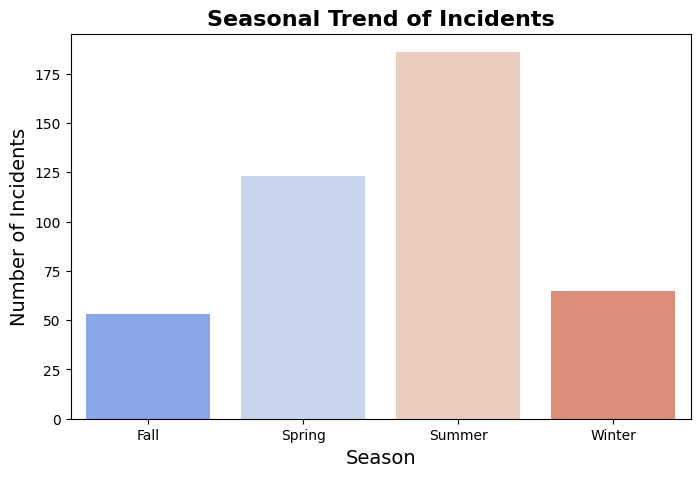

In [15]:

# Seasonal Trend Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=seasonal_trends, x='Season', y='Incident Count', palette='coolwarm')
plt.title('Seasonal Trend of Incidents', fontsize=16, fontweight='bold')
plt.xlabel('Season', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.show()

In [16]:

# Step 4: Explore Peak Periods
# Find the peak month
peak_month = monthly_trends.loc[monthly_trends['Incident Count'].idxmax()]
print(f"Peak Month: {peak_month['Month']} with {peak_month['Incident Count']} incidents")

# Find the peak season
peak_season = seasonal_trends.loc[seasonal_trends['Incident Count'].idxmax()]
print(f"Peak Season: {peak_season['Season']} with {peak_season['Incident Count']} incidents")


Peak Month: 6 with 72 incidents
Peak Season: Summer with 186 incidents


In [20]:
data.sample(5)

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Latitude,Longitude,Coordinates_Found,Month,Year,Day,Season
46,3013319,2024-09-02,Alabama,Bessemer,200 Fourth Ave N,0,4,0,0,0,NaN,33.40203,-86.95399,Yes,9,2024,2,Fall
145,2963018,2024-07-07,North Carolina,Roper,12256 NC-32,1,3,0,0,0,NaN,35.87748,-76.61582,Yes,7,2024,7,Summer
321,2873416,2024-04-07,Texas,San Antonio,11135 Wye Dr,0,6,0,0,0,NaN,29.42458,-98.49461,Yes,4,2024,7,Spring
398,2812327,2024-01-25,Missouri,Kansas City,3100 block of E Linwood Blvd,0,4,0,0,0,NaN,39.10344,-94.58311,Yes,1,2024,25,Winter
80,2994803,2024-08-14,Virginia,Petersburg,200 block of Boisseau St,0,4,0,0,2,NaN,37.22815,-77.40348,Yes,8,2024,14,Summer


In [24]:
import folium

# Initialize a map centered at an average latitude and longitude
center_lat, center_lon = data['Latitude'].mean(), data['Longitude'].mean()
incident_map = folium.Map(location=[center_lat, center_lon], zoom_start=5)

# Add markers to the map for each incident
for _, row in data.iterrows():
    location = (row['Latitude'], row['Longitude'])
    popup_info = (f"<strong>Location:</strong> {row['City Or County']}, {row['State']}<br>"
                  f"<strong>Killed:</strong> {row['Victims Killed']}<br>"
                  f"<strong>Injured:</strong> {row['Victims Injured']}")
    folium.Marker(location, popup=popup_info).add_to(incident_map)

# Save the map to an HTML file
incident_map.save("incident_map.html")
print("Map saved as 'incident_map.html'")


#This code creates an interactive map with markers for each incident, showing location and details (killed/injured). It saves the map as incident_map.html for visualization.



Map saved as 'incident_map.html'
